## Capstone Project

***

## Project Description

Inu + Neko is a company you’ve seen a lot in this course. As a reminder, they are a pet supply and services company that just started an e-commerce business. You have been asked to help them analyze their data to help them make better decisions in the future. 

Inu + Neko had a lot of success with a marketing campaign and is seeing a lot of growth. The company wants to know how these new incoming customers differ from their past customers. Are there different items they should stock more of? Are there other things they should consider?

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("inu_neko_orderline_clean.csv", parse_dates=["date"], dayfirst=True)

In [3]:
df

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,date,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
0,10300097,719638000000.00,1001019,35:21.4,2021,1,1,2021-01-01,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99
1,10300093,73201504044.00,1001015,33:37.5,2021,1,1,2021-01-01,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95
2,10300093,719638000000.00,1001015,33:37.5,2021,1,1,2021-01-01,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99
3,10300093,441531000000.00,1001015,33:37.5,2021,1,1,2021-01-01,1,2,34,New York,28.45,Ball and String,toy,cat,56.90
4,10300093,733427000000.00,1001015,33:37.5,2021,1,1,2021-01-01,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38218,10327860,287664000000.00,1022098,37:12.8,2021,6,30,2021-06-30,30,1,25,New York,9.95,All Veggie Yummies,treat,dog,9.95
38219,10327960,140160000000.00,1022157,45:09.9,2021,6,30,2021-06-30,30,2,31,Pennsylvania,48.95,Snoozer Essentails,bedding,dog,97.90
38220,10328009,425361000000.00,1022189,57:44.3,2021,6,30,2021-06-30,30,2,53,New Jersey,15.99,Snack-em Fish,treat,cat,31.98
38221,10328089,733427000000.00,1022236,59:29.8,2021,6,30,2021-06-30,30,1,23,Tennessee,18.95,Yum Fish-Dish,food,cat,18.95


In [ ]:
df.info()

In [ ]:
df.describe(include='all')

In [ ]:
df.columns

### Type Change

In [ ]:
df.info()

In [ ]:
df["trans_id"] = df["trans_id"].astype('category')

In [ ]:
df["prod_upc"] = df["prod_upc"].astype('category')

In [ ]:
df["cust_id"] = df["cust_id"].astype('category')

In [ ]:
df.info()

In [ ]:
df.describe(include='all')

### Groupby Function

In [ ]:
df.groupby(["trans_id"])["total_sales"].sum().head()

In [ ]:
d1 = pd.DataFrame(df.groupby(["trans_id"])["total_sales"].sum())

In [ ]:
d1.sort_values(by="total_sales")

In [ ]:
d1.plot(figsize=(25,5))
plt.show()

In [ ]:
df.groupby(["prod_upc"])["total_sales"].sum().head()

In [ ]:
d2 = pd.DataFrame(df.groupby(["prod_upc"])["total_sales"].sum())

In [ ]:
d2.sort_values(by="total_sales")

In [ ]:
d2.plot(figsize=(25,5))
plt.show()

In [ ]:
df.groupby(["cust_id"])["total_sales"].sum().head()

In [ ]:
d3 = pd.DataFrame(df.groupby(["cust_id"])["total_sales"].sum())

In [ ]:
d3.sort_values(by="total_sales")

In [ ]:
d3.plot(figsize=(25,5))
plt.show()

In [ ]:
df.groupby(["trans_month"])["total_sales"].sum()

In [ ]:
d4 = pd.DataFrame(df.groupby(["trans_month"])["total_sales"].sum())

In [ ]:
d4.sort_values(by="total_sales")

In [ ]:
d4.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["trans_day"])["total_sales"].sum().head()

In [ ]:
d5 = pd.DataFrame(df.groupby(["trans_day"])["total_sales"].sum())

In [ ]:
d5.sort_values(by="total_sales").head()

In [ ]:
d5.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["cust_state"])["total_sales"].sum().head()

In [ ]:
d6 = pd.DataFrame(df.groupby(["cust_state"])["total_sales"].sum())

In [ ]:
d6.sort_values(by="total_sales").head()

In [ ]:
d6.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["prod_title"])["total_sales"].sum().head()

In [ ]:
d7 = pd.DataFrame(df.groupby(["prod_title"])["total_sales"].sum())

In [ ]:
d7.sort_values(by="total_sales")

In [ ]:
d7.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["prod_category"])["total_sales"].sum().head()

In [ ]:
d8 = pd.DataFrame(df.groupby(["prod_category"])["total_sales"].sum())

In [ ]:
d8.sort_values(by="total_sales")

In [ ]:
d8.plot(figsize=(25,5), kind="bar")
plt.show()

In [ ]:
df.groupby(["prod_animal_type"])["total_sales"].sum().head()

In [ ]:
d9 = pd.DataFrame(df.groupby(["prod_animal_type"])["total_sales"].sum())

In [ ]:
d9.sort_values(by="total_sales")

In [ ]:
d9.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["date"])["total_sales"].sum().head()

In [ ]:
d10 = pd.DataFrame(df.groupby(["date"])["total_sales"].sum())

In [ ]:
d10.sort_values(by="total_sales")

In [ ]:
df.groupby(["trans_month"])["trans_quantity"].sum()

In [ ]:
d11 = pd.DataFrame(df.groupby(["trans_month"])["trans_quantity"].sum())

In [ ]:
d11.sort_values(by="trans_quantity")

In [ ]:
d11.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["trans_day"])["trans_quantity"].sum().head()

In [ ]:
d12 = pd.DataFrame(df.groupby(["trans_day"])["trans_quantity"].sum())

In [ ]:
d12.sort_values(by="trans_quantity").head()

In [ ]:
d12.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["cust_age"])["trans_quantity"].sum().head()

In [ ]:
d13 = pd.DataFrame(df.groupby(["cust_age"])["trans_quantity"].sum())

In [ ]:
d13.sort_values(by="trans_quantity").head()

In [ ]:
d13.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["cust_state"])["trans_quantity"].sum().head()

In [ ]:
d14 = pd.DataFrame(df.groupby(["cust_state"])["trans_quantity"].sum())

In [ ]:
d14.sort_values(by="trans_quantity").head()

In [ ]:
d14.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["prod_title"])["trans_quantity"].sum().head()

In [ ]:
d15 = pd.DataFrame(df.groupby(["prod_title"])["trans_quantity"].sum())

In [ ]:
d15.sort_values(by="trans_quantity").head()

In [ ]:
d15.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["prod_category"])["trans_quantity"].sum().head()

In [ ]:
d16 = pd.DataFrame(df.groupby(["prod_category"])["trans_quantity"].sum())

In [ ]:
d16.sort_values(by="trans_quantity")

In [ ]:
d16.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.groupby(["prod_animal_type"])["trans_quantity"].sum().head()

In [ ]:
d17 = pd.DataFrame(df.groupby(["trans_month"])["trans_quantity"].sum())

In [ ]:
d17.sort_values(by="trans_quantity")

In [ ]:
d17.plot(figsize=(25,5), kind='bar')
plt.show()

In [ ]:
df.columns

In [ ]:
df.groupby(["trans_month"])["trans_quantity"].count()

In [ ]:
df.groupby(["trans_day"])["trans_quantity"].count()

## Data Visualization

### Univariate Data Exploration

In [ ]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

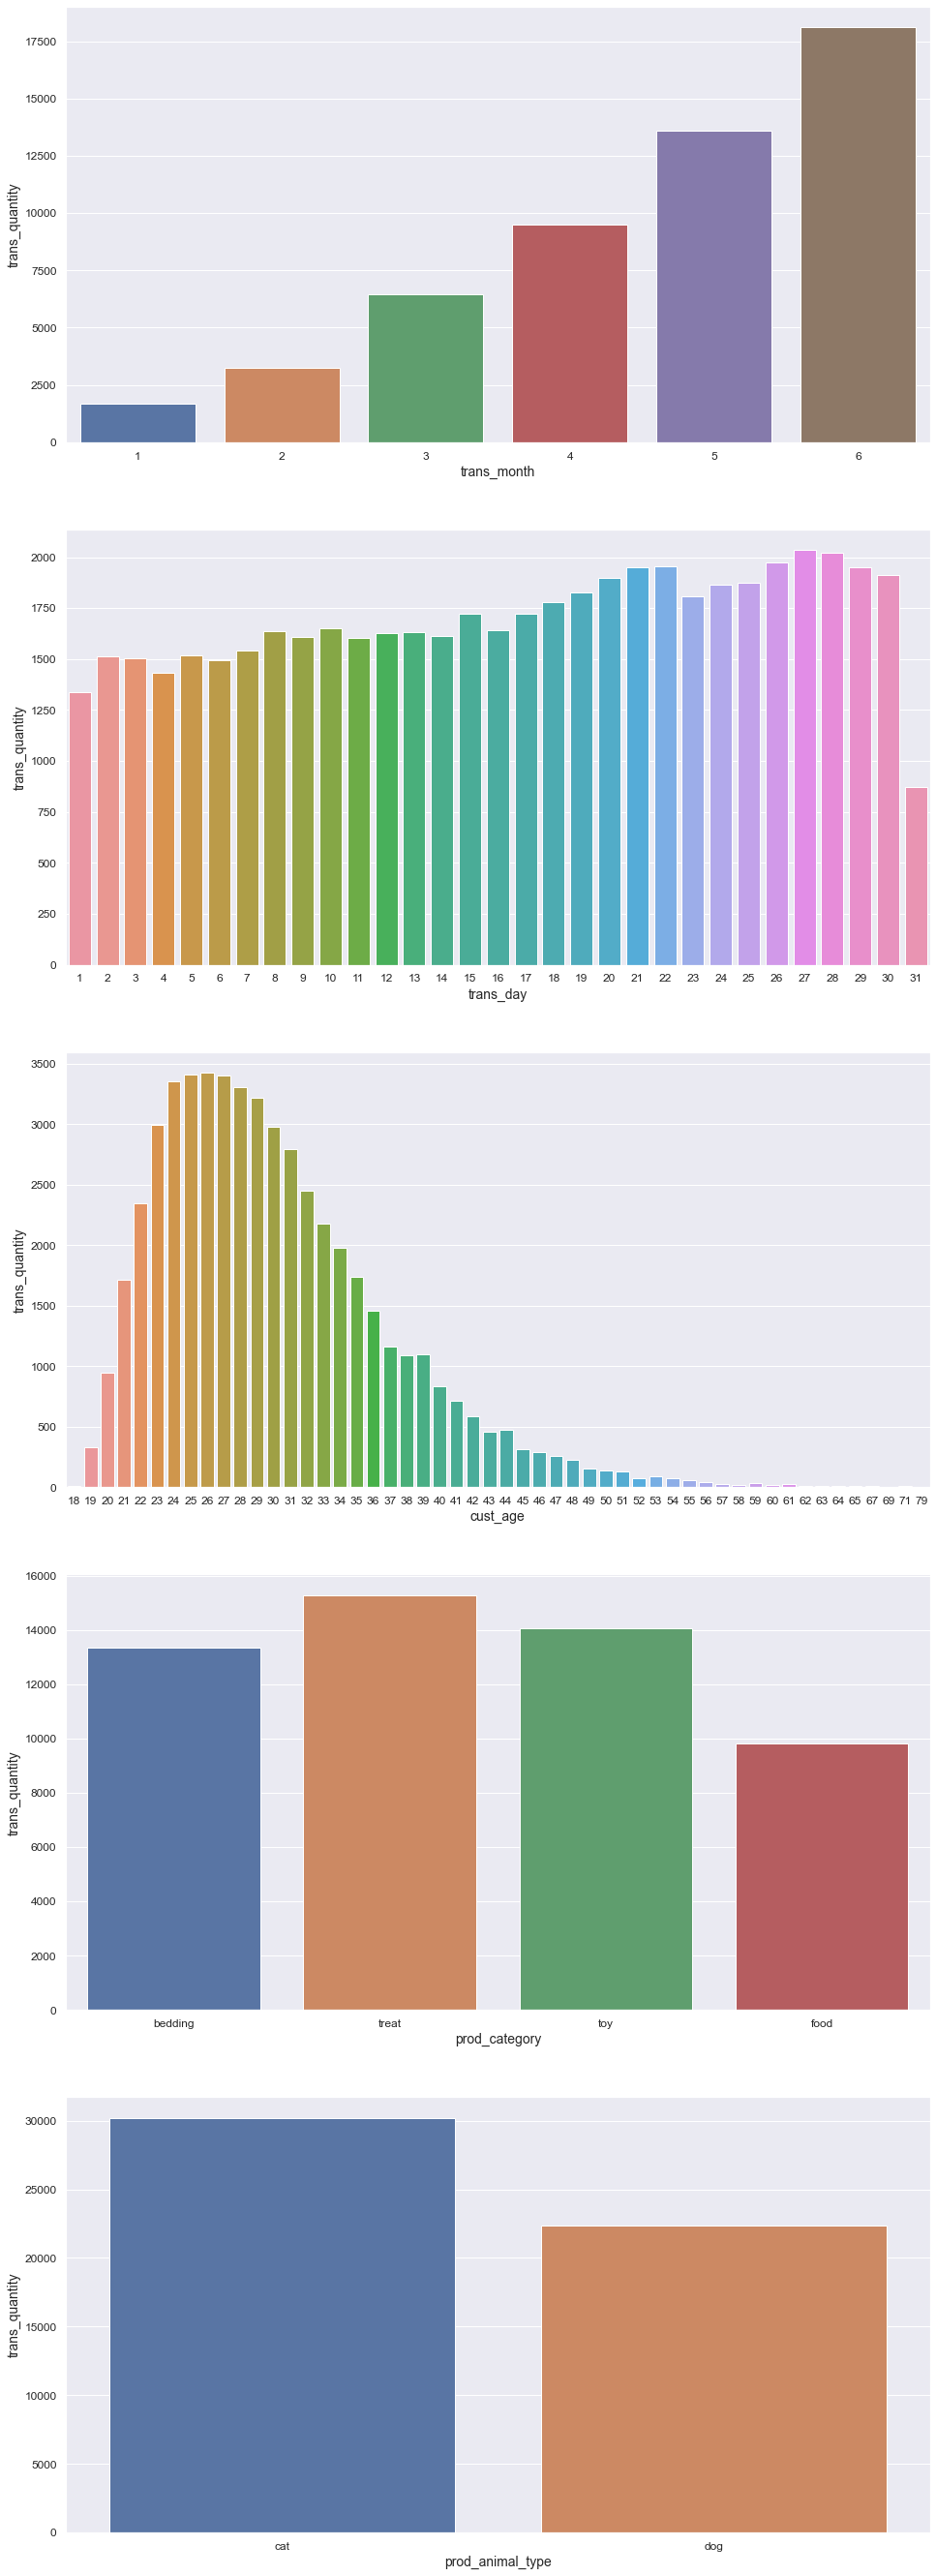

In [7]:
fig, ax = plt.subplots(5,1, sharex=False, figsize=(16,48))
#fig.suptitle('Main Title', y=0.7)


sns.barplot(x="trans_month", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)

sns.barplot(x="trans_day", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)

sns.barplot(x="cust_age", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[2])
#ax[2].set_title('Title of the second chart')
#ax[2].tick_params('x', labelrotation=45)


sns.barplot(x="prod_category", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[3])
#ax[3].set_title('')
#ax[3].tick_params('x', labelrotation=45)

sns.barplot(x="prod_animal_type", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[4])
#ax[3].set_title('')
#ax[3].tick_params('x', labelrotation=45)

plt.show()

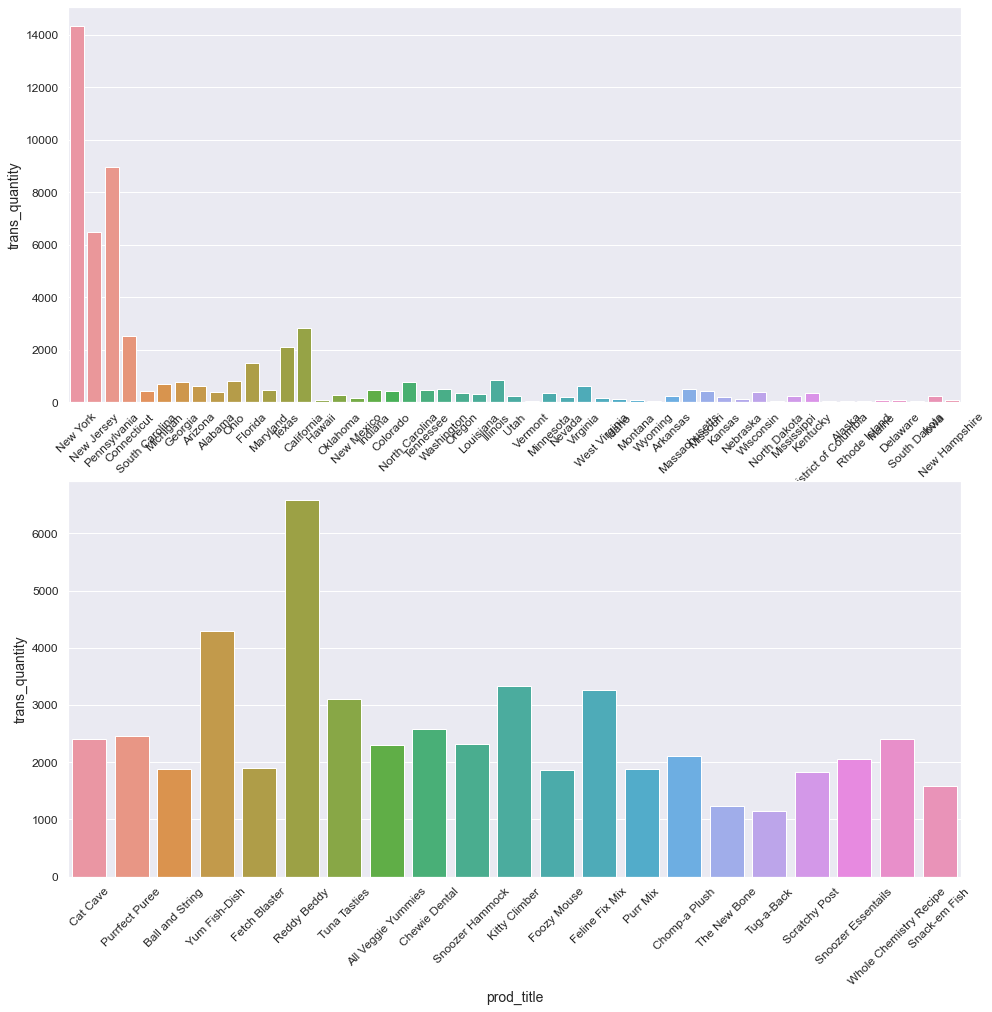

In [11]:
fig, ax = plt.subplots(2,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title', y=0.7)


sns.barplot(x="cust_state", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[0])
#ax[0].set_title('Title of the second chart')
ax[0].tick_params('x', labelrotation=45)

sns.barplot(x="prod_title", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[1])
#ax[0].set_title('')
ax[1].tick_params('x', labelrotation=45)



plt.show()

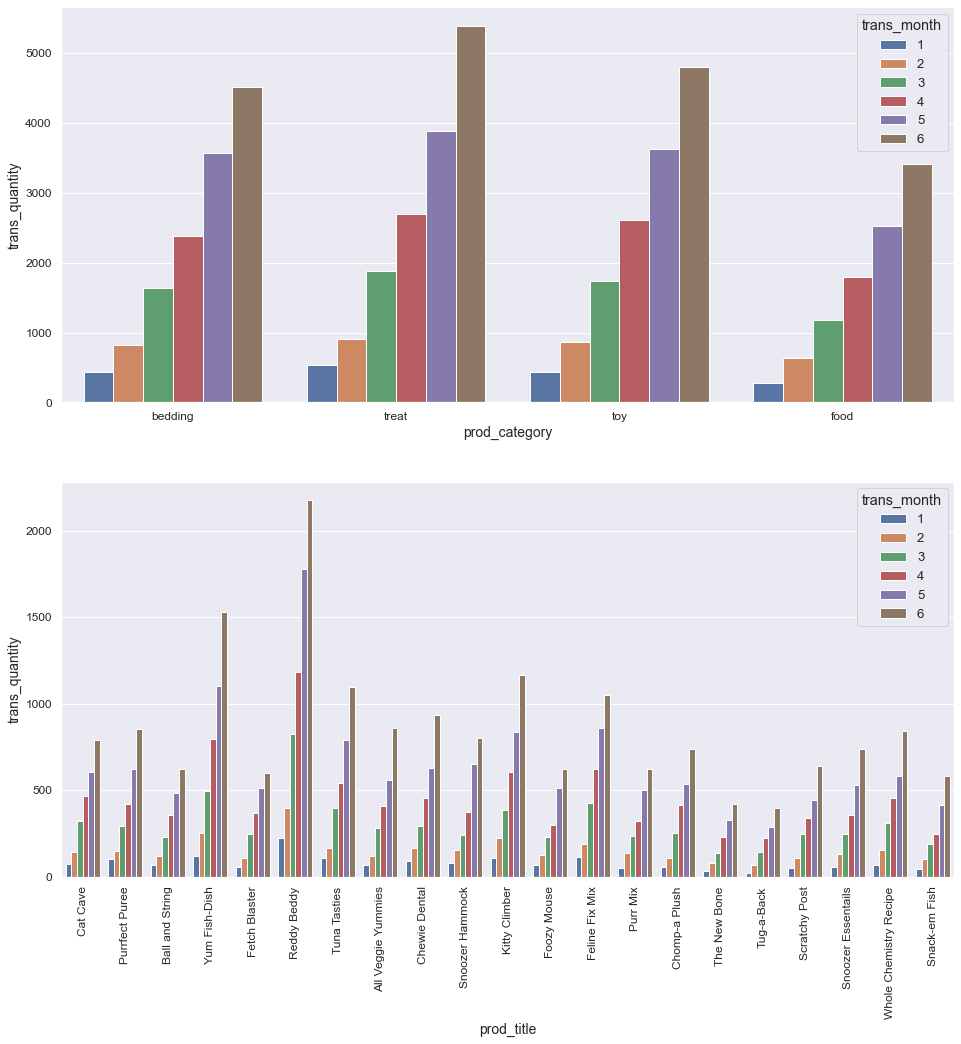

In [18]:
fig, ax = plt.subplots(2,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title', y=0.7)


sns.barplot(x="prod_category", y="trans_quantity", hue="trans_month", data=df, ci=None, estimator=sum, ax=ax[0])
#ax[0].set_title('')
#ax[0].tick_params('x', labelrotation=45)

sns.barplot(x="prod_title", y="trans_quantity", hue="trans_month", data=df, ci=None, estimator=sum, ax=ax[1])
#ax[1].set_title('')
ax[1].tick_params('x', labelrotation=90)

plt.show()

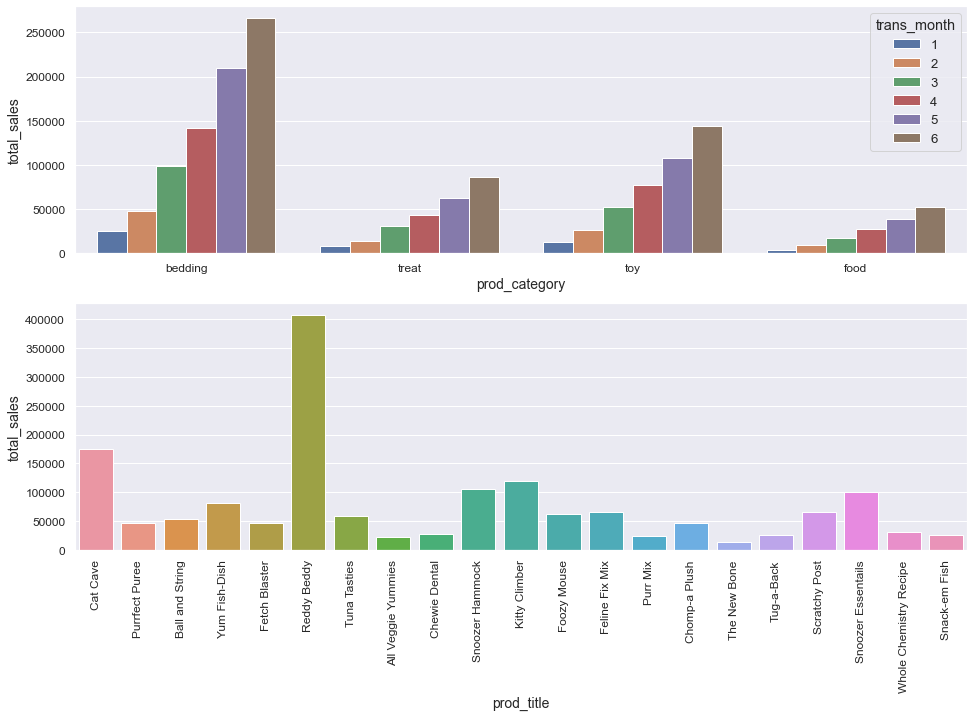

In [17]:
fig, ax = plt.subplots(2,1, sharex=False, figsize=(16,10))
#fig.suptitle('Main Title', y=0.7)


sns.barplot(x="prod_category", y="total_sales", hue="trans_month", data=df, ci=None, estimator=sum, ax=ax[0])
#ax[0].set_title('')
#ax[0].tick_params('x', labelrotation=45)

sns.barplot(x="prod_title", y="total_sales", data=df, ci=None, estimator=sum, ax=ax[1])
#ax[1].set_title('')
ax[1].tick_params('x', labelrotation=90)



plt.show()

In [ ]:
fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title', y=0.7)


sns.barplot(x="trans_month", y="total_sales", data=df, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)

sns.barplot(x="trans_month", y="total_sales", data=df, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)

sns.barplot(x="trans_month", y="total_sales", data=df, ax=ax[2])
#ax[2].set_title('Title of the second chart')
#ax[2].tick_params('x', labelrotation=45)

sns.barplot(x="trans_month", y="total_sales", data=df, ax=ax[3])
#ax[3].set_title('Title of the second chart')
#ax[3].tick_params('x', labelrotation=45)

plt.show()

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,10))
fig.suptitle('Main Title', y=0.5)

sns.barplot(x="trans_month", y="total_sales", data=df, ax=ax1)
ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)


sns.barplot(x="trans_month", y="total_sales", data=df, ax=ax2)
ax2.set_title('Title of the second chart', size=20)
#ax2.tick_params('x', labelrotation=45)

sns.countplot(x="", data=df, ax=ax3)
ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)

sns.countplot(x="", data=df, ax=ax4)
ax4.set_title('Title of the fourth chart', size=20)
#ax4.tick_params('x', labelrotation=45)


plt.show()

In [ ]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,2)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,3)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,4)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,5)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,6)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,7)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,8)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,9)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,10)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,11)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,12)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,13)
plt.title("", size=20)
sns.relplot()

plt.subplot(7,2,14)
plt.title("", size=20)
sns.relplot()

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='gender', hue = 'tenure', row = 'division',
            kind='count', data=ratings_df,
            height = 3, aspect = 1)

g.set_xlabels("")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.catplot(x="calories", y="restaurant",

                hue="is_salad", ci=None,

                data=df_calories, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

### Time-Series Analysis

In [ ]:
df.columns

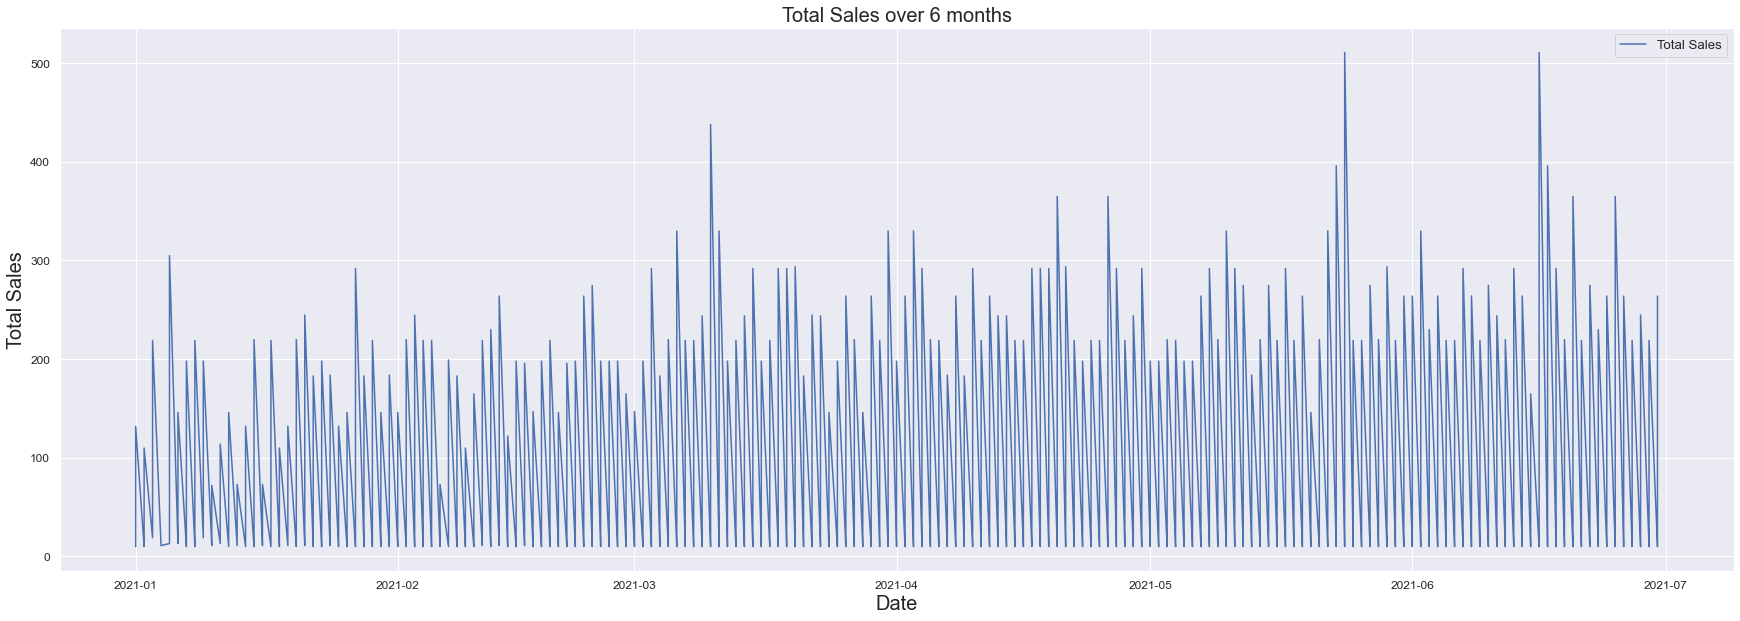

In [4]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date,y=df.total_sales,data=df, estimator=None)
plt.title("Total Sales over 6 months", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Total Sales", fontsize=20)
plt.legend(['Total Sales'])
plt.show()

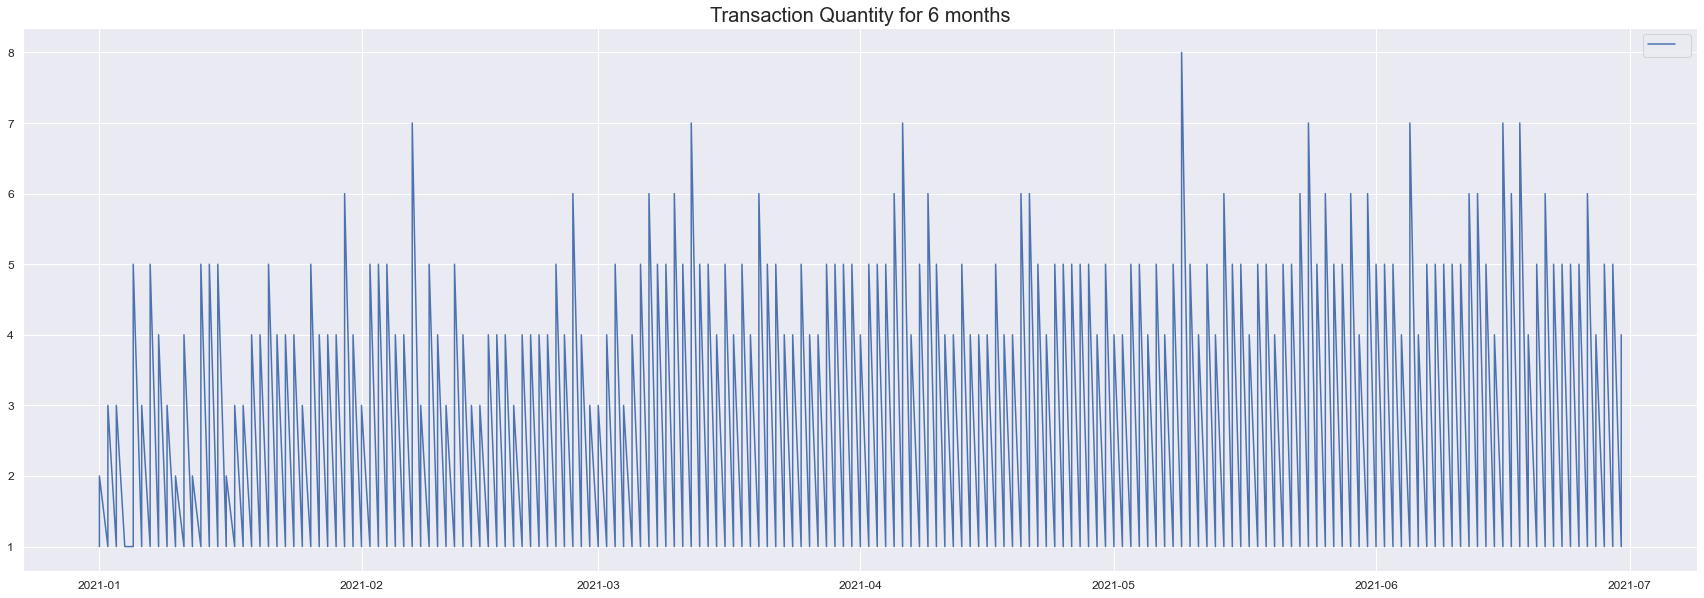

In [5]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date,y=df.trans_quantity,data=df, estimator=None)
plt.title("Transaction Quantity for 6 months", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

### Pairplots

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(500))
plt.show()

### Bivariate Data Exploration

In [ ]:
sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

plt.tight_layout()
plt.show()

### Regression plot

In [ ]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#Feature

ax1 = sns.regplot(x=X_test.bmi, y=lr_pred, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plot 1", size=15)

#Feature

ax2 = sns.regplot(x=X_test.s5, y=lr_pred, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Plot 2", size=15)

#Feature

ax3 = sns.regplot(x=X_test.bp, y=lr_pred, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Plot 3", size=15)

#Feature

ax4 = sns.regplot(x=X_test.s4, y=lr_pred, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax1.set_title("Plot 4", size=15)

plt.show()

### Correlation

In [ ]:
df.corr()

In [ ]:
df.corr()["target"].sort_values()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

## Data Preprocessing

### Feature Engineering

### Equal Width Discretization

In [ ]:
df["demoscorecat"] = df["polityscore"] #Make a copy

In [ ]:
disc = EqualWidthDiscretiser(bins=4, variables=['demoscorecat'], return_object=True)

In [ ]:
disc

In [ ]:
disc.fit(df)

In [ ]:
disc.binner_dict_

In [ ]:
df2 = disc.fit_transform(df)
df2.head()

In [ ]:
df2["demoscorecat"].value_counts().plot.bar()
plt.show()

### Equal Frequency Discretizer

In [ ]:
df2["co2cat"] = df2["co2emissions"] #Make a copy

In [ ]:
disc = EqualFrequencyDiscretiser(q=5, variables=['co2cat'])

In [ ]:
disc.fit(df2)

In [ ]:
disc.binner_dict_

In [ ]:
df3 = disc.transform(df2)
df3.head()

In [ ]:
df3["co2cat"].value_counts().plot.bar()
plt.show()

### Discretisation + OrdinalEncoder

In [ ]:
### Choose which columns to be discretized first
df3["incomecat"] = df3["incomeperperson"] #Make a copy
df3["alccat"] = df3["alcconsumption"] #Make a copy

In [ ]:
df3.head()

In [ ]:
# to encode variables we need them returned as objects for feature-engine
disc = EqualFrequencyDiscretiser(q=5, variables=['incomecat','alccat'], return_object=True)

In [ ]:
df4 = disc.fit_transform(df3)
df4.head()

In [ ]:
df4["incomecat"].value_counts().plot.bar()
df4["alccat"].value_counts().plot.bar()
plt.show()

In [ ]:
# Set y = target variable, and x = independant variables (both must be objects)

In [ ]:
df5 = df4[['demoscorecat','incomecat', 'alccat']]
df5.head()

In [ ]:
df5.dtypes

In [ ]:
df5.groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

In [ ]:
df5.groupby('alccat')['demoscorecat'].mean().plot()
plt.show()

In [ ]:
enc = OrdinalEncoder(encoding_method = 'ordered')

In [ ]:
X = df5[['incomecat', 'alccat']]

In [ ]:
y = df5['demoscorecat']

In [ ]:
enc.fit(X, y)

In [ ]:
X_transform = enc.transform(X)

In [ ]:
enc.encoder_dict_

In [ ]:
X_transform  # Transformed for monotonic relationship

In [ ]:
pd.concat([X_transform, y], axis=1)

In [ ]:
pd.concat([X_transform, y], axis=1).groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

### Discretisation with Decision Trees

In [ ]:
df4['electricat'] = df4['relectricperperson'] #Make a copy

In [ ]:
df4.head()

In [ ]:
# Let y = demoscorecat, and x = electricat, breastcancerper100th

df6 = df4[['breastcancerper100th','electricat','demoscorecat']]
df6.head()

In [ ]:
X = df6[['breastcancerper100th','electricat']]
y = df6['demoscorecat']

In [ ]:
# set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=5, scoring='accuracy', variables=['electricat'], regression=False,
                                  param_grid={'max_depth':[1,2,3], 'min_samples_leaf':[2,4,6]})

In [ ]:
treeDisc.fit(X,y)

In [ ]:
treeDisc.binner_dict_['electricat'].best_params_

In [ ]:
treeDisc.scores_dict_['electricat']

In [ ]:
X_transform = treeDisc.transform(X) #Only electricat column

In [ ]:
X_transform

In [ ]:
X_transform.electricat.unique()

In [ ]:
# monotonic relationship with target: train set

pd.concat([X_transform, y],axis=1)

### Drop unwanted features

In [ ]:
df.columns

In [ ]:
df.drop()

### Treat Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
df[''] = df[''].replace(np.nan,df.mean())

In [ ]:
#imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [ ]:
#imputer.fit(df)

In [ ]:
#df = imputer.transform(df)

In [ ]:
df.isnull().sum()

### Replacing values

In [ ]:
df.replace()

### Rounding Values

In [ ]:
###pandas.DataFrame.round
df[['internetuserate']] = df[['internetuserate']].round(decimals=0)

### Treat Duplicate Values

In [ ]:
df.duplicated(keep='first').sum()

In [ ]:
df[df.duplicated(keep=False)] #Check duplicate values

In [ ]:
df.drop_duplicates(ignore_index=True, inplace=True)

### Treat Outliers

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
#windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5, variables=[])

In [ ]:
#windsorizer.fit(df)

In [ ]:
#df2 = windsorizer.transform(df)

In [ ]:
#df2

In [ ]:
#df2.describe()

In [ ]:
#windsorizer.left_tail_caps_

In [ ]:
#windsorizer.right_tail_caps_

### One-hot encoding

In [ ]:
df.info()

In [ ]:
df["has_gas"] = pd.get_dummies(data=df["has_gas"],drop_first=True)

### Save to CSV

In [ ]:
df.to_csv("filename.csv", index=False)

## Regression Analysis

### Linear Regression

In [ ]:
df.columns

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(x)

In [ ]:
linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x_variables', fig=fig)

### Logistic Regression

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.Logit(y, X).fit()

In [ ]:
model.summary()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ Debt_Service_Coverage + cash_security_to_curLiab + TNW', data = hgc).fit()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ TNW + C(seg2)', data = hgcdev).fit()

#### Python code done by Dennis Lam